In [1]:
from standardInclude import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
path = "/home/jlab/g-2/caloTrackMatching/data/run2c/"; dataset='Run 2C'
#path = "/home/jlab/g-2/caloTrackMatching/data/endgame/"; dataset='EndGame'
files = os.listdir(path)
print(files)
names = [x.split("_")[0] for x in files]
print(names)

fs = {}
for file in files:
    name = file.split("_")[0]
    fs[name] = r.TFile(path+file)
    fs[name].ls()

['tracks_run2c.root', 'clusters_run2c.root', 'matchedTracks_run2c.root']
['tracks', 'clusters', 'matchedTracks']
TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
  KEY: TH3F	clusters13;1	clusters
  KEY: TH3F	randclusters13;1	time randomized clusters
  KEY: TH3F	clust

In [3]:
allFitResults = {}

In [4]:
station = 12
calo = station+1

---

### First create a function which will act as a standard pool from which we can pull our fit functions, just for ease of switching between them

In [5]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

---

# Lets start with the tracker-only information


In [6]:
name = 'tracks'
f = fs[name]
f.ls()

TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time


In [7]:
trackerBeamPos = f.Get("trackerBeamPosRand").Clone()
trackerCaloPos = f.Get("trackerCaloPosRand").Clone()
trackerCaloPos_noRadialField = f.Get("trackerCaloPos_noRadialField").Clone()
trackerCaloPos_noRadialFieldRand = f.Get("trackerCaloPos_noRadialFieldRand").Clone()

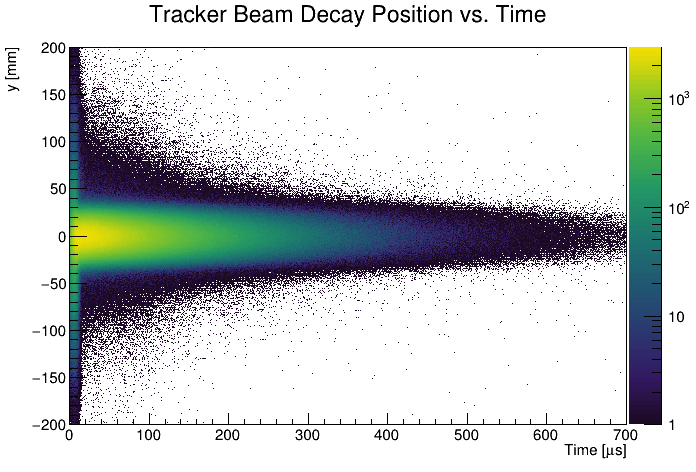

In [8]:
c = r.TCanvas()
#trackerBeamPos.Draw("lego2z")
trackerBeamPos.GetZaxis().SetRange(trackerBeamPos.GetZaxis().FindBin(station),trackerBeamPos.GetZaxis().FindBin(station))

hi = trackerBeamPos.Project3D("yx").Clone()
hi.SetTitle("Tracker Beam Decay Position vs. Time; Time [#mus]; y [mm]")
hi.Draw("colz")
c.SetLogz()
c.Draw()

---

### Lets get the beam position vs. time for the selected station

In [9]:
trackerBeamPos.GetZaxis().SetRange(trackerBeamPos.GetZaxis().FindBin(station),trackerBeamPos.GetZaxis().FindBin(station))
widthDict = getWidths(trackerBeamPos.Project3D("yx"))

In [10]:
tlow = 30
thigh = 500
func,paramVec = fitfunc(0, [tlow,thigh],[15,-170,0.00053,0.061]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'],nFit=2)
allFitResults[name+"_beam"] = fitresult

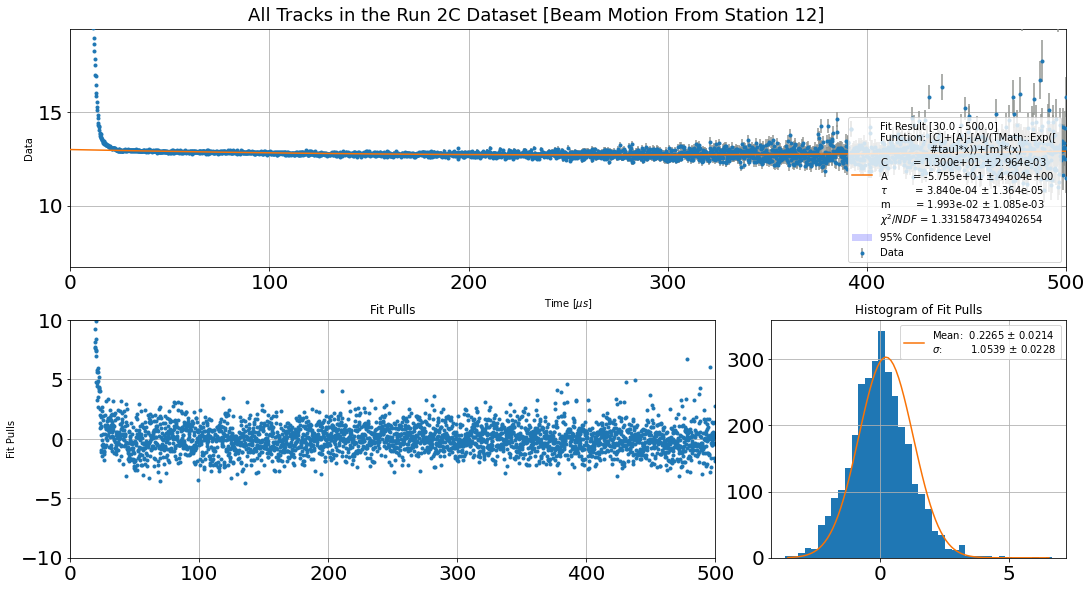

In [11]:
#fitresult.f.SetParameters(15,-170,0.00053,0.061)

fig,ax = fitresult.draw("All Tracks in the "+dataset+" Dataset [Beam Motion From Station "+str(station)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(11,15)
for i in range(2):
    ax[i].set_xlim(0,500)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

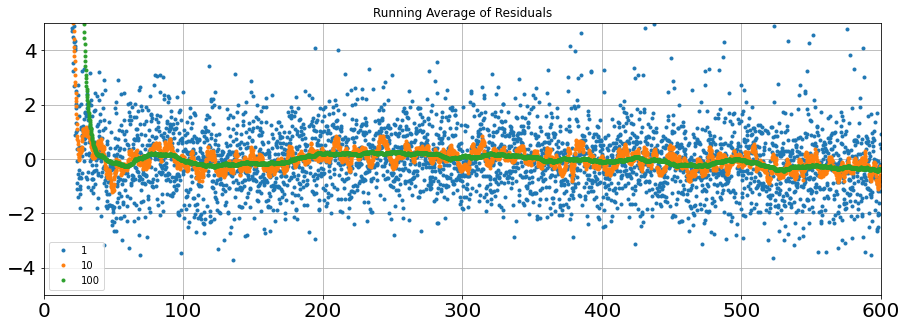

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
fitresult.plotResiduals(ax, 1, ".", "1", 1)
fitresult.plotResiduals(ax, 1, ".", "10", 10)
fitresult.plotResiduals(ax, 1, ".", "100", 100)
plt.xlim(0,600)
plt.ylim(-5,5)
plt.grid()
plt.title("Running Average of Residuals")
plt.legend()
plt.show()

Restricting range of FFT to: [60, 300]


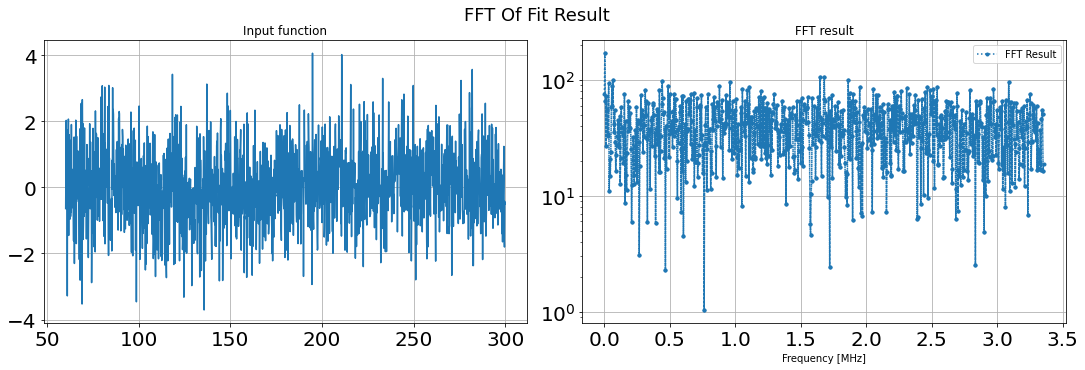

(array([ 0.        ,  0.00416859,  0.00833718, ..., -0.01250577,
        -0.00833718, -0.00416859]),
 array([ 75.83312954  +0.j        ,  58.02162961+159.67583381j,
         20.10386661 -62.20819843j, ..., -19.0678115  +19.2479971j ,
         20.10386661 +62.20819843j,  58.02162961-159.67583381j]))

In [13]:
fitresult.fft([60,300],2)

---

### And the calo face position vs. time for the selected station

In [14]:
trackerCaloPos.GetZaxis().SetRange(trackerCaloPos.GetZaxis().FindBin(station),trackerCaloPos.GetZaxis().FindBin(station))
widthDict = getWidths(trackerCaloPos.Project3D("yx"))

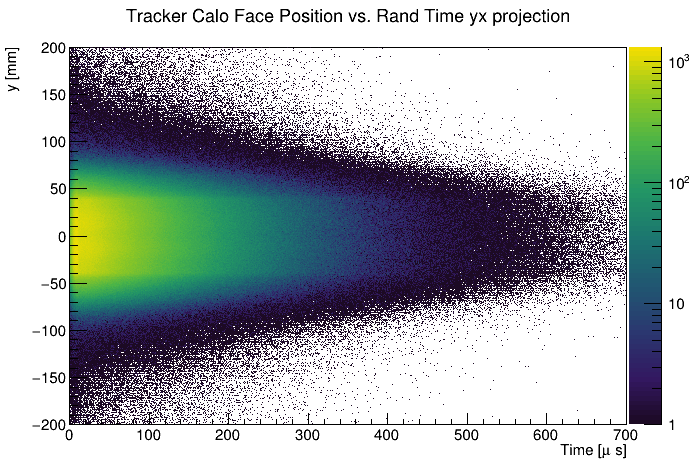

In [15]:
c = r.TCanvas()
hi = trackerCaloPos.Project3D("yx").Clone()
hi.Draw("colz")
c.SetLogz()
c.Draw()

In [16]:
tlow = 30
thigh = 500
func,paramVec = fitfunc(0, [tlow,thigh],[32, 3.5, 0.0005, -0.005]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_calo"] = fitresult

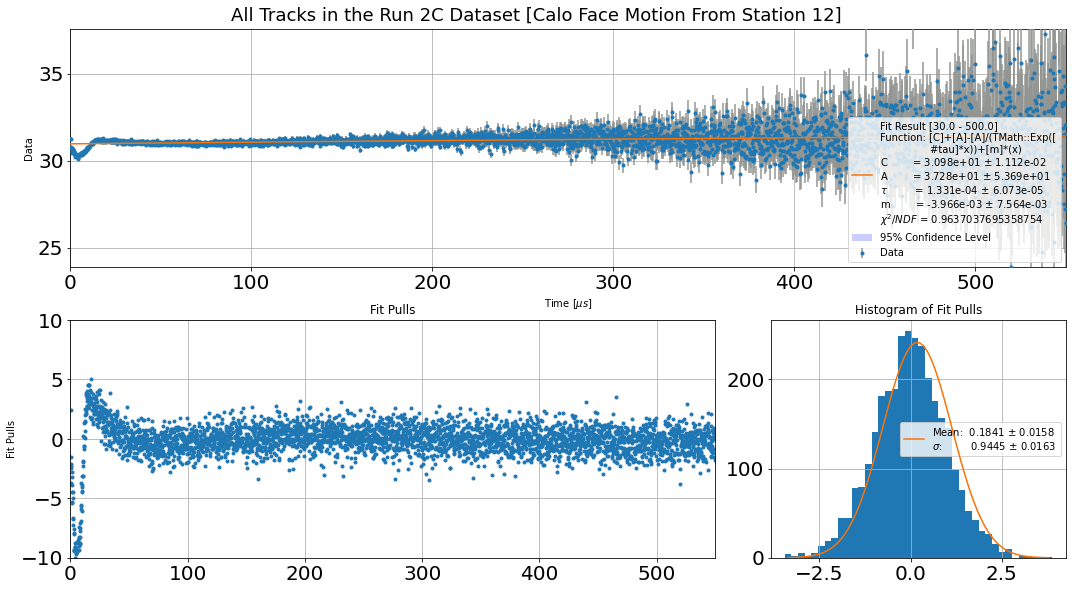

In [17]:
fig,ax = fitresult.draw("All Tracks in the "+dataset+" Dataset [Calo Face Motion From Station "+str(station)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(30,35)
for i in range(2):
    ax[i].set_xlim(0,550)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

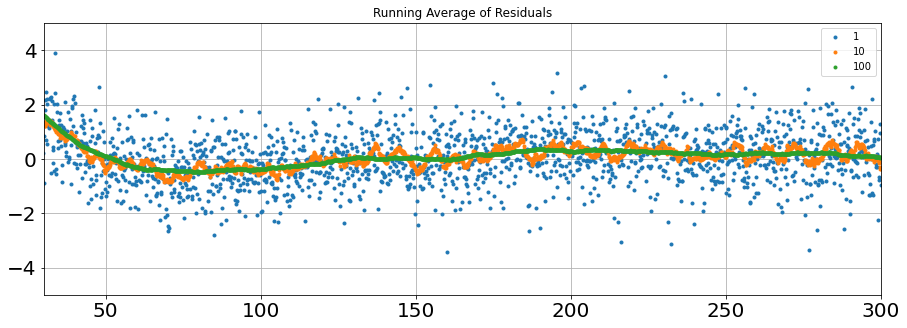

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
fitresult.plotResiduals(ax, 1, ".", "1", 1)
fitresult.plotResiduals(ax, 1, ".", "10", 10)
fitresult.plotResiduals(ax, 1, ".", "100", 100)
plt.xlim(30,300)
plt.ylim(-5,5)
plt.grid()
plt.title("Running Average of Residuals")
plt.legend()
plt.show()

Restricting range of FFT to: [20, 300]


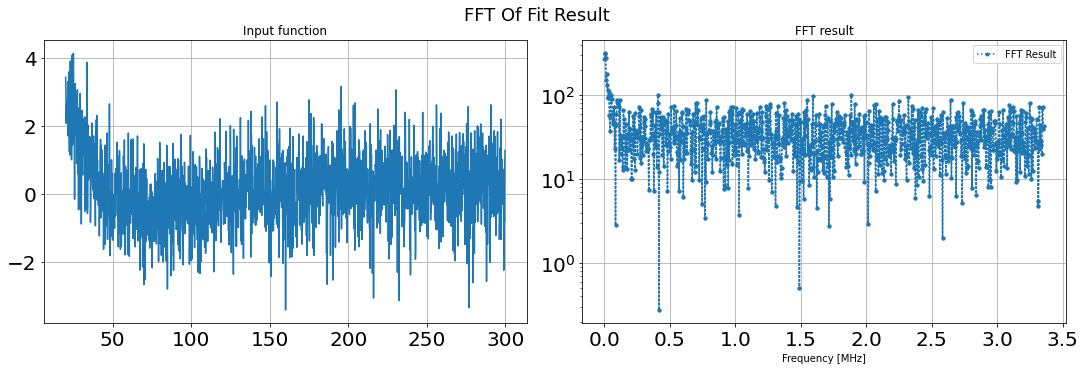

(array([ 0.        ,  0.00357181,  0.00714362, ..., -0.01071543,
        -0.00714362, -0.00357181]),
 array([271.89920152+4.44089210e-15j, 184.6947568 +2.58350538e+02j,
        299.43925339-6.87628076e+01j, ..., 243.95862694+1.33640545e+02j,
        299.43925339+6.87628076e+01j, 184.6947568 -2.58350538e+02j]))

In [19]:
fitresult.fft([20,300],2)

---

### Calo face position vs. time (from tracker, but ignoring radial field)

In [20]:
trackerCaloPos_noRadialFieldRand.GetZaxis().SetRange(
    trackerCaloPos_noRadialFieldRand.GetZaxis().FindBin(station),
    trackerCaloPos_noRadialFieldRand.GetZaxis().FindBin(station))
widthDict = getWidths(trackerCaloPos_noRadialFieldRand.Project3D("yx"))

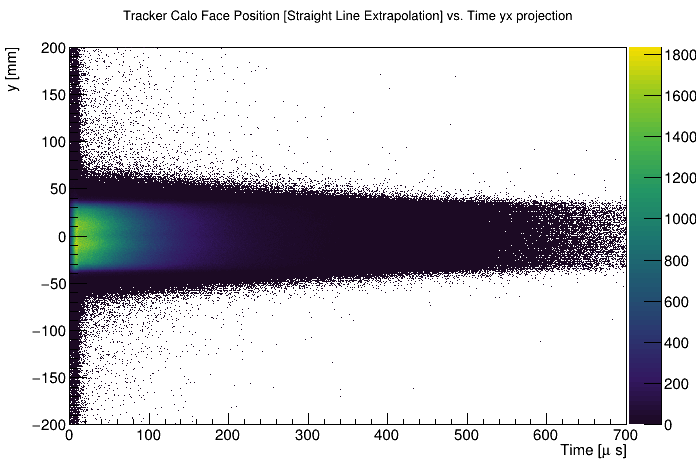

In [21]:
c = r.TCanvas()
trackerCaloPos_noRadialFieldRand.Project3D("yx").Draw("colz")
c.Draw()

In [22]:
tlow = 20
thigh = 600

func,paramVec = fitfunc(0, [tlow,thigh],[32, 3.5, 0.0005, -0.005]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_calo_noRadialField"] = fitresult

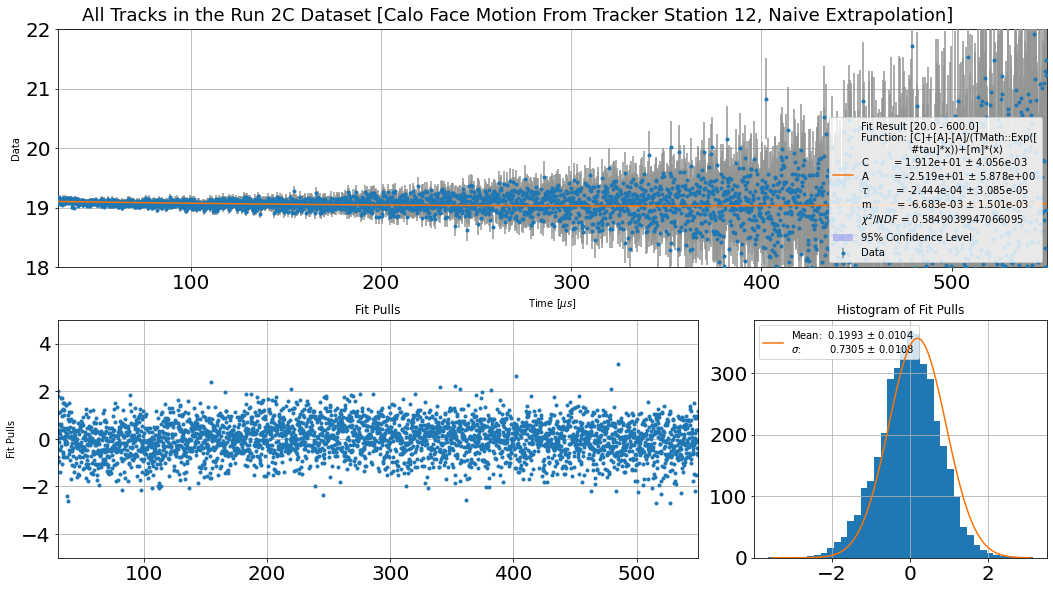

In [23]:
fig,ax = fitresult.draw("All Tracks in the "+dataset+" Dataset [Calo Face Motion From Tracker Station "+str(station)+", Naive Extrapolation]", 
                        yrange=[None, [-5,5]], fmti=".", do_pulls=True)
#ax[0].set_ylim(-2,2)
for i in range(2):
    ax[i].set_xlim(30,550)
ax[0].set_ylim(18,22)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

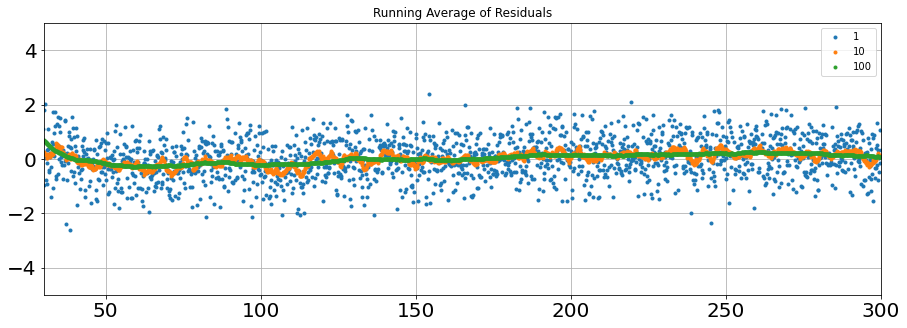

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
fitresult.plotResiduals(ax, 1, ".", "1", 1)
fitresult.plotResiduals(ax, 1, ".", "10", 10)
fitresult.plotResiduals(ax, 1, ".", "100", 100)
plt.xlim(30,300)
plt.ylim(-5,5)
plt.grid()
plt.title("Running Average of Residuals")
plt.legend()
plt.show()

Restricting range of FFT to: [30, 300]


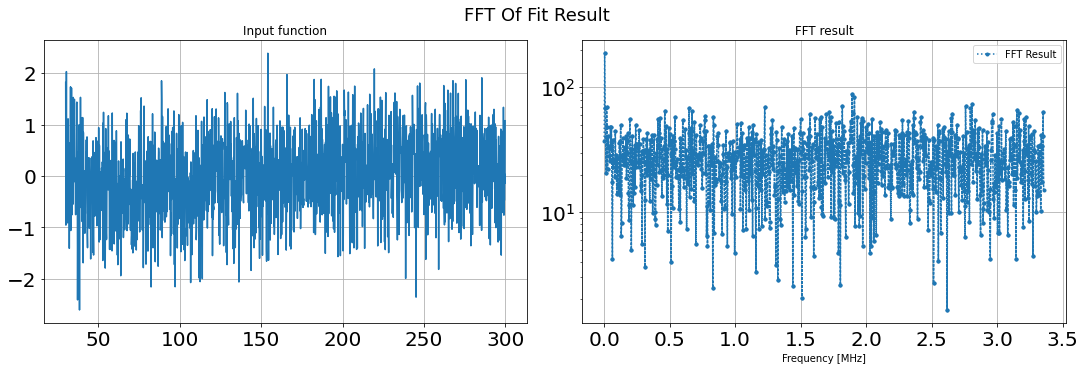

(array([ 0.        ,  0.00370388,  0.00740776, ..., -0.01111164,
        -0.00740776, -0.00370388]),
 array([37.23557226  +0.j        , -3.10510212+187.93982352j,
        22.89077639 +64.77320104j, ..., 25.52930758 -30.51493258j,
        22.89077639 -64.77320104j, -3.10510212-187.93982352j]))

In [25]:
fitresult.fft([30,300],2)

---

# And now the calo only information

In [26]:
name = 'clusters'
f = fs[name]
f.ls()

TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
  KEY: TH3F	clusters13;1	clusters
  KEY: TH3F	randclusters13;1	time randomized clusters
  KEY: TH3F	clusters19;1	clusters
  KEY: TH3F	randclusters19;1	time randomized clusters


In [27]:
clusters = f.Get("clusters"+str(calo)).Clone()
randclusters = f.Get("randclusters"+str(calo)).Clone()

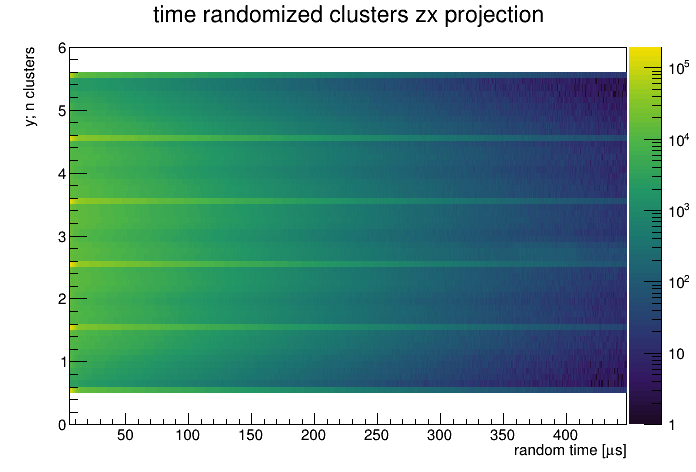

In [28]:
c = r.TCanvas()
randclusters.Project3D("zx").Draw("colz")
c.SetLogz()
c.Draw()

---
### Calo face position

In [29]:
randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(1000),randclusters.GetYaxis().FindBin(2400))
widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

In [30]:
tlow = 30
thigh = 300

func,paramVec = fitfunc(1, [tlow,thigh]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_calo"] = fitresult

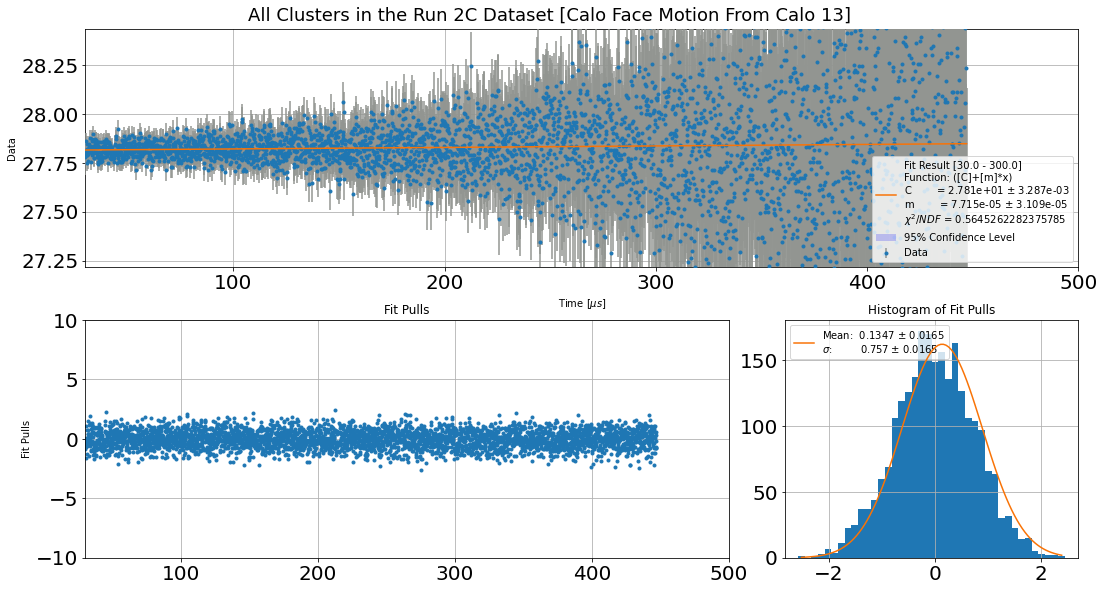

In [31]:
fig,ax = fitresult.draw("All Clusters in the "+dataset+" Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(-2,2)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(30,500)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

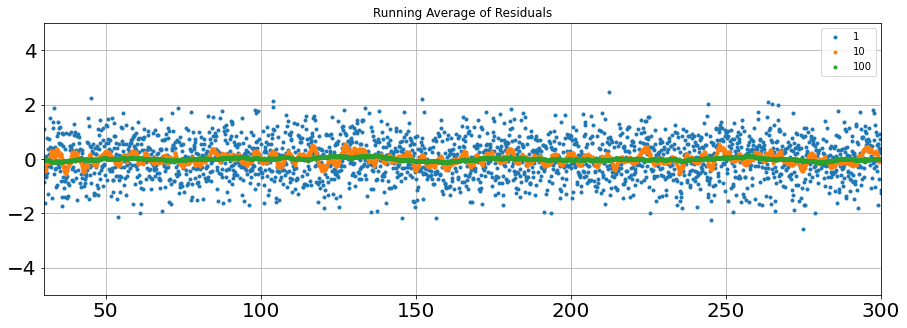

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
fitresult.plotResiduals(ax, 1, ".", "1", 1)
fitresult.plotResiduals(ax, 1, ".", "10", 10)
fitresult.plotResiduals(ax, 1, ".", "100", 100)
plt.xlim(30,300)
plt.ylim(-5,5)
plt.grid()
plt.title("Running Average of Residuals")
plt.legend()
plt.show()

Restricting range of FFT to: [30, 300]


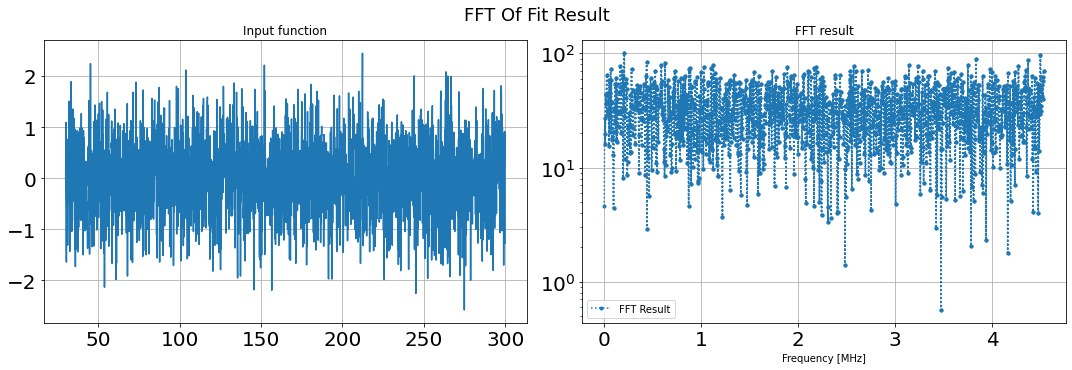

(array([ 0.        ,  0.0037032 ,  0.00740639, ..., -0.01110959,
        -0.00740639, -0.0037032 ]),
 array([  4.56470328+2.13162821e-14j,   1.68536019-1.95077271e+01j,
        -20.00400039+1.85276527e+01j, ...,  16.00109192+1.16501219e+00j,
        -20.00400039-1.85276527e+01j,   1.68536019+1.95077271e+01j]))

In [33]:
fitresult.fft([30,300],2)

---

# And finally the calo-matched information

In [34]:
name = 'matchedTracks'
f = fs[name]
f.ls()

TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/matchedTracks_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/matchedTracks_run2c.root	
  OBJ: TH3I	trackerBeamPosRand	Tracker Beam Position vs. Rand Time : 0 at: 0x557cb2781c00
  OBJ: TH3I	trackerCaloPosRand	Tracker Calo Face Position vs. Rand Time : 0 at: 0x557cb2778190
  OBJ: TH3I	trackerCaloPos_noRadialField	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time : 0 at: 0x557cb277e4e0
  OBJ: TH3I	trackerCaloPos_noRadialFieldRand	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time : 0 at: 0x557cb277ff30
  OBJ: TH2D	trackerBeamPosRand_yx	Tracker Beam Position vs. Rand Time yx projection : 0 at: 0x557cb293deb0
  OBJ: TH1D		Tracker Beam Position vs. Rand Time yx projection : 0 at: 0x557cb29c4de0
  OBJ: TH2D	trackerCaloPosRand_yx	Tracker Calo Face Position vs. Rand Time yx projection : 0 at: 0x557cb37a0f30
  OBJ: TH2D	trackerCaloPosRand_yx	Tracker Calo Face Position vs. Rand Time yx projection

In [35]:
trackerBeamPos_match = f.Get("trackerBeamPosRand").Clone()
trackerCaloPos_match = f.Get("trackerCaloPosRand").Clone()
caloCaloPos_match = f.Get("caloCaloPosRand").Clone()
trackerCaloPos_noRadialField_match = f.Get("trackerCaloPos_noRadialField").Clone()
trackerCaloPos_noRadialFieldRand_match = f.Get("trackerCaloPos_noRadialFieldRand").Clone()

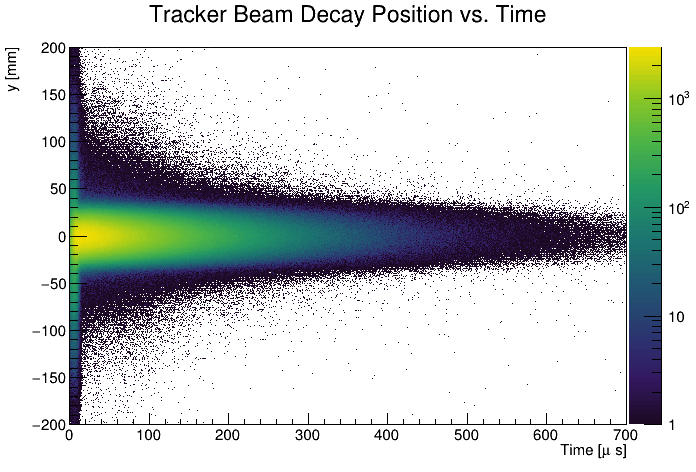

In [36]:
c = r.TCanvas()
#trackerBeamPos.Draw("lego2z")
trackerBeamPos_match.GetZaxis().SetRange(trackerBeamPos_match.GetZaxis().FindBin(station),
                                         trackerBeamPos_match.GetZaxis().FindBin(station))

hi = trackerBeamPos_match.Project3D("yx").Clone()
hi.SetTitle("Tracker Beam Decay Position vs. Time")
hi.Draw("colz")
c.SetLogz()
c.Draw()

---

### Beam position vs. time

In [37]:
trackerBeamPos_match.GetZaxis().SetRange(trackerBeamPos_match.GetZaxis().FindBin(station),
                                         trackerBeamPos_match.GetZaxis().FindBin(station))
widthDict = getWidths(trackerBeamPos_match.Project3D("yx"))

In [38]:
tlow = 30
thigh = 500

func,paramVec = fitfunc(0, [tlow,thigh],[15,-170,0.00053,0.061]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_beam"] = fitresult

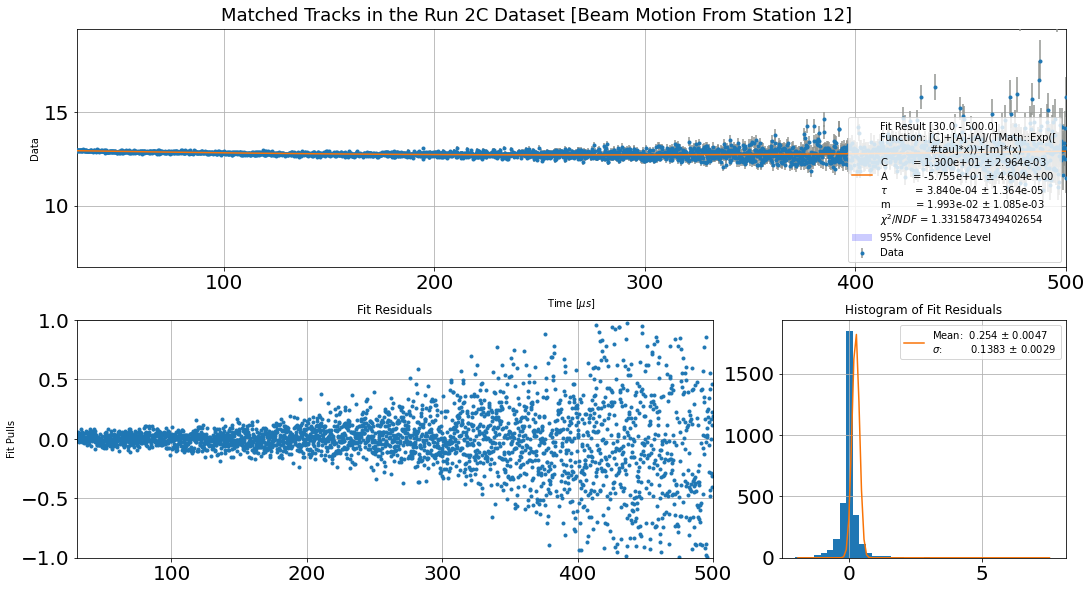

In [39]:
fig,ax = fitresult.draw("Matched Tracks in the "+dataset+" Dataset [Beam Motion From Station "+str(station)+"]", 
                        yrange=[None, [-1,1]], fmti=".", do_pulls=False)
#ax[0].set_ylim(-2,2)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(30,500)
ax[0].set_xlabel(r"Time [$\mu s$]")

plt.show()

---

### Calo face position vs. time (from tracker)

In [40]:
trackerCaloPos_match.GetZaxis().SetRange(trackerCaloPos_match.GetZaxis().FindBin(station),
                                         trackerCaloPos_match.GetZaxis().FindBin(station))
widthDict = getWidths(trackerCaloPos_match.Project3D("yx"))

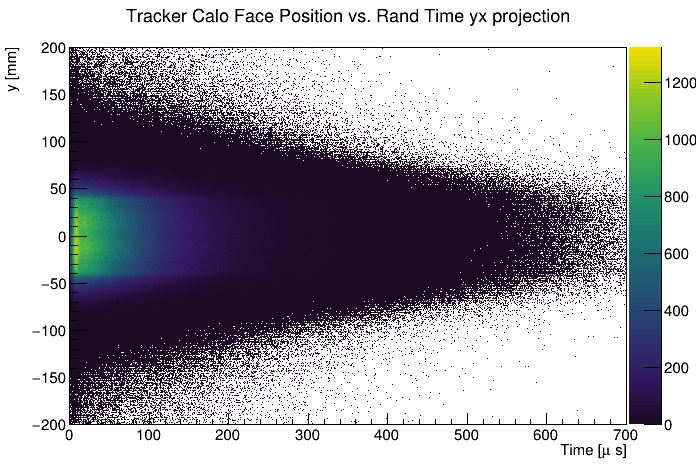

In [41]:
c = r.TCanvas()
#trackerCaloPos_noRadialField.Project3D("yx").Draw("colz")
trackerCaloPos_match.Project3D("yx").Draw("colz")
trackerCaloPos_match.SetTitle("Normal Extrapolation to Calo Face")
c.Draw()

In [42]:
tlow = 30
thigh = 500

func,paramVec = fitfunc(0, [tlow,thigh],[32, 3.5, 0.0005, -0.005]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_calo"] = fitresult

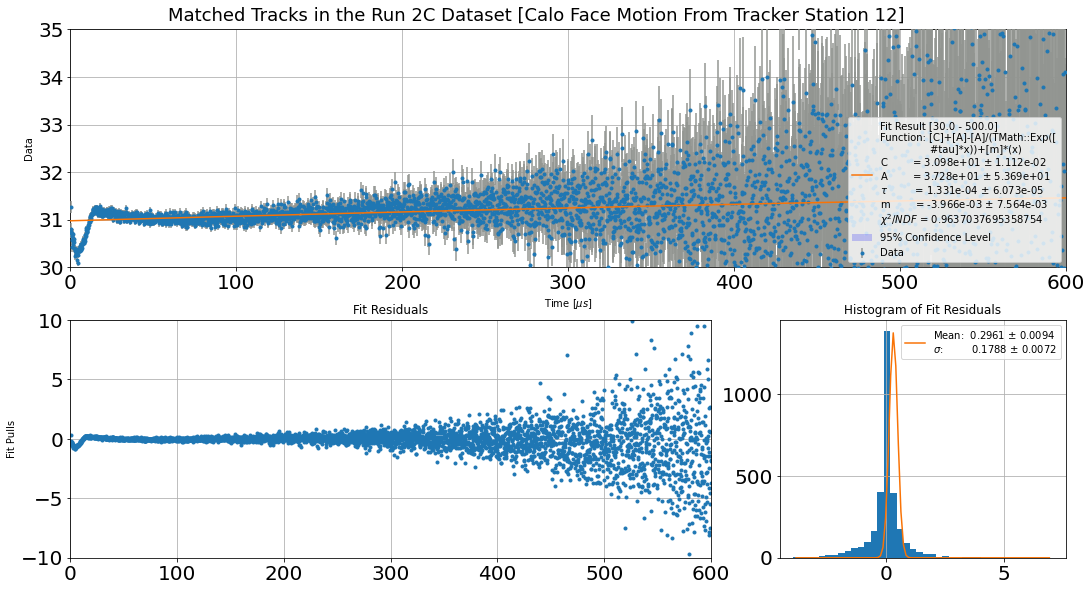

In [43]:
fig,ax = fitresult.draw("Matched Tracks in the "+dataset+" Dataset [Calo Face Motion From Tracker Station "+str(station)+"]", 
                        yrange=[[30,35], [-10,10]], fmti=".", do_pulls=False)
#ax[0].set_ylim(-2,2)
for i in range(2):
    ax[i].set_xlim(0,600)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

---

### Calo face position vs. time (from tracker, but ignoring radial field)

In [44]:
trackerCaloPos_noRadialFieldRand_match.GetZaxis().SetRange(
    trackerCaloPos_noRadialFieldRand_match.GetZaxis().FindBin(station),
    trackerCaloPos_noRadialFieldRand_match.GetZaxis().FindBin(station))
widthDict = getWidths(trackerCaloPos_noRadialFieldRand_match.Project3D("yx"))

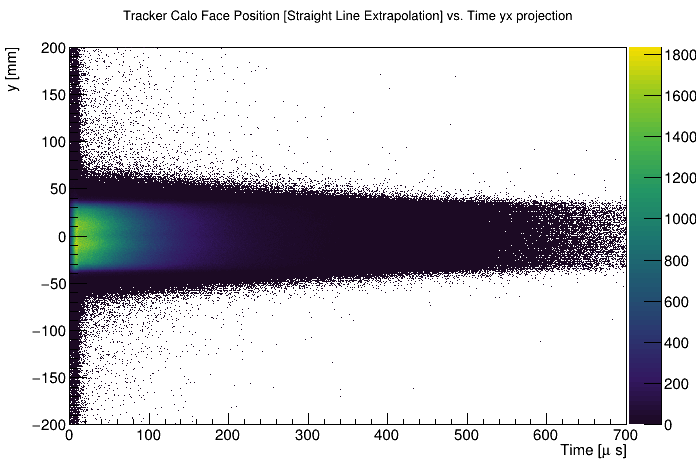

In [45]:
c = r.TCanvas()
#trackerCaloPos_noRadialField.Project3D("yx").Draw("colz")
trackerCaloPos_noRadialFieldRand_match.Project3D("yx").Draw("colz")
c.Draw()

In [46]:
tlow = 30
thigh = 600

func,paramVec = fitfunc(0, [tlow,thigh], [32, 3.5, 0.0005, -0.005]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_calo_noRadialField"] = fitresult

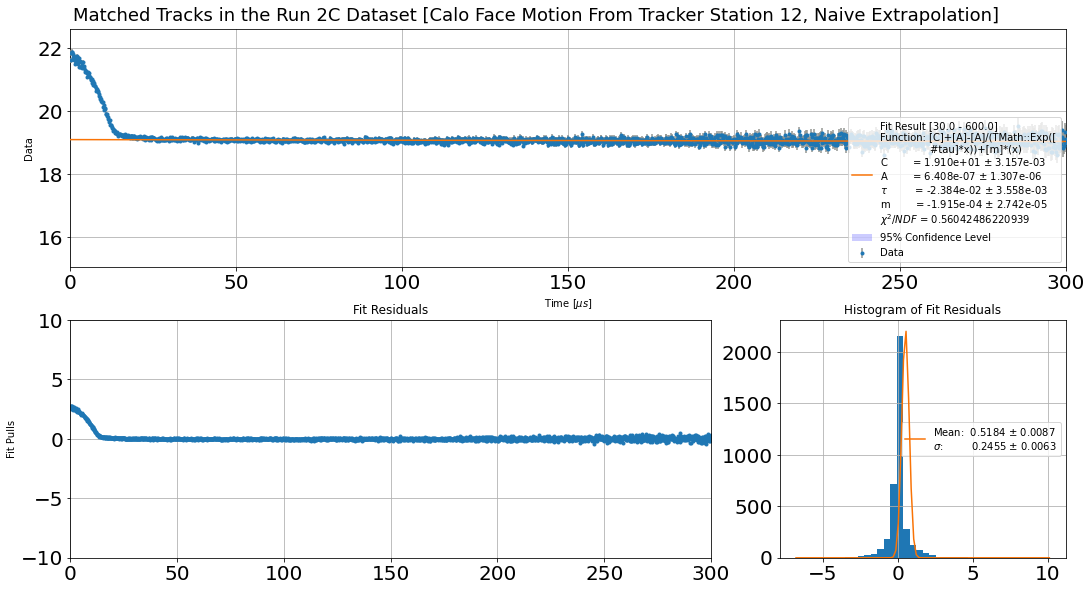

In [47]:
fig,ax = fitresult.draw("Matched Tracks in the Run 2C Dataset [Calo Face Motion From Tracker Station "+str(station)+", Naive Extrapolation]", 
                        yrange=[None, [-10,10]], fmti=".", do_pulls=False)
#ax[0].set_ylim(-2,2)
for i in range(2):
    ax[i].set_xlim(0,300)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

---

### Calo face position vs. time (from clusters)

In [48]:
caloCaloPos_match.GetZaxis().SetRange(caloCaloPos_match.GetZaxis().FindBin(station),
                                      caloCaloPos_match.GetZaxis().FindBin(station))
widthDict = getWidths(caloCaloPos_match.Project3D("yx"))

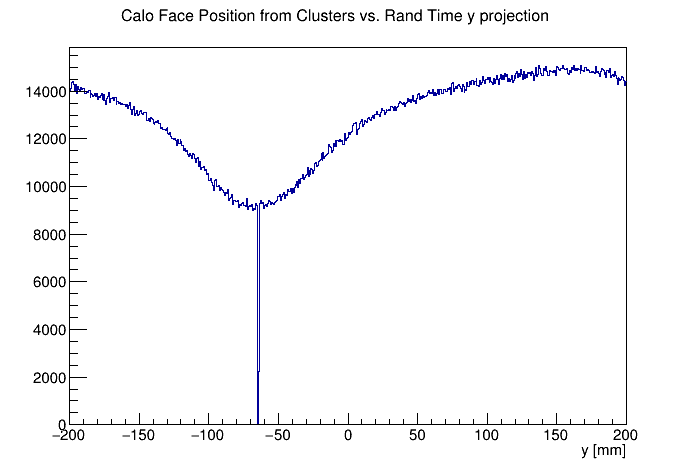

In [49]:
c = r.TCanvas()
#trackerCaloPos_noRadialField.Project3D("yx").Draw("colz")
caloCaloPos_match.Project3D("y").Draw("colz")
c.Draw()

In [50]:
tlow = 30
thigh = 300

func,paramVec = fitfunc(1, [tlow,thigh]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
allFitResults[name+"_clusters"] = fitresult

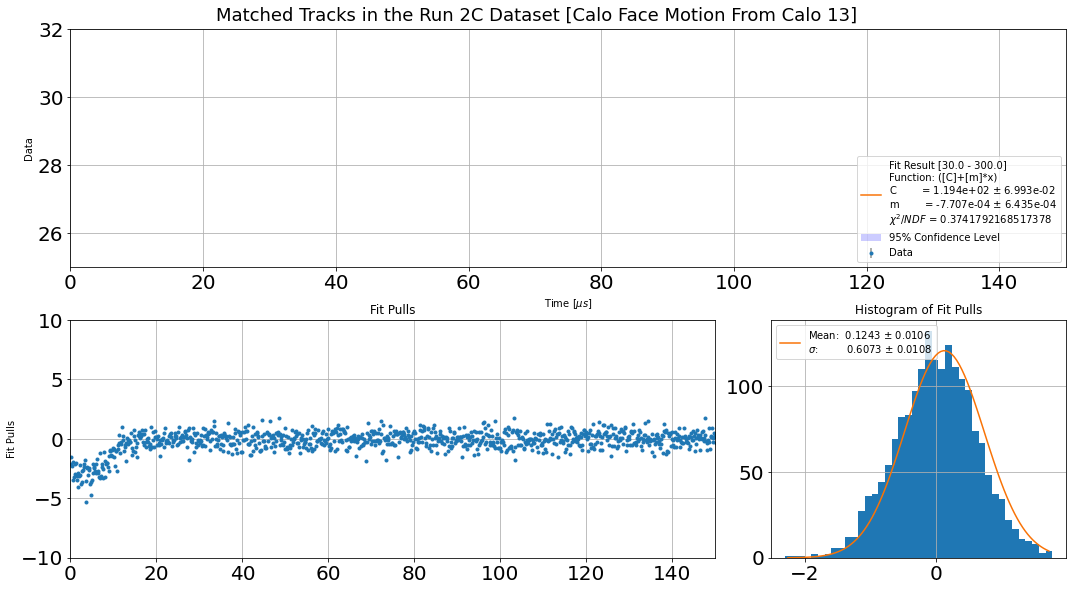

In [51]:
fig,ax = fitresult.draw("Matched Tracks in the "+dataset+" Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
ax[0].set_ylim(25,32)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(0,150)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

---

# Now lets compare the fit results from these datasets

In [52]:
print(allFitResults)

{'tracks_beam': <python_fit.fitVector object at 0x7f287d84a2d0>, 'tracks_calo': <python_fit.fitVector object at 0x7f287c8e0e90>, 'tracks_calo_noRadialField': <python_fit.fitVector object at 0x7f2882f03350>, 'clusters_calo': <python_fit.fitVector object at 0x7f287c80a790>, 'matchedTracks_beam': <python_fit.fitVector object at 0x7f2882fa6fd0>, 'matchedTracks_calo': <python_fit.fitVector object at 0x7f287cebd190>, 'matchedTracks_calo_noRadialField': <python_fit.fitVector object at 0x7f2882887450>, 'matchedTracks_clusters': <python_fit.fitVector object at 0x7f287cdf5810>}


In [53]:
pars = []
parErrs = []
fitnames = []
allNames = []

for name,fit in allFitResults.items():
    print(name)
    fitnames.append(name)
    pars.append(fit.pars)
    parErrs.append(fit.parErrs)
    allNames.append( fit.parNames() )
print(allNames)

tracks_beam
tracks_calo
tracks_calo_noRadialField
clusters_calo
matchedTracks_beam
matchedTracks_calo
matchedTracks_calo_noRadialField
matchedTracks_clusters
[['C', 'A', '$\\tau$ ', 'm'], ['C', 'A', '$\\tau$ ', 'm'], ['C', 'A', '$\\tau$ ', 'm'], ['C', 'm'], ['C', 'A', '$\\tau$ ', 'm'], ['C', 'A', '$\\tau$ ', 'm'], ['C', 'A', '$\\tau$ ', 'm'], ['C', 'm']]


In [54]:
parDict = {}
parErrDict = {}
histNames = {}
for names in allNames:
    for name in names:
        parDict[name] = []
        parErrDict[name] = []
        histNames[name] = []
for i, names in enumerate(allNames):
    for j, name in enumerate(names):
        parDict[name].append( pars[i][j] )
        parErrDict[name].append( parErrs[i][j] )
        histNames[name].append(fitnames[i])

In [55]:
print(parDict)
print(histNames)

{'C': [13.004709027292211, 30.97608998032976, 19.120831853767545, 27.813726885630487, 13.004709027292211, 30.97608998032976, 19.095506791484986, 119.3596922418134], 'A': [-57.546272763455455, 37.28327009420242, -25.192316524772174, -57.546272763455455, 37.28327009420242, 6.407959232641571e-07], '$\\tau$ ': [0.0003840408468710306, 0.00013309658411070344, -0.0002443677365189834, 0.0003840408468710306, 0.00013309658411070344, -0.023840493484852246], 'm': [0.019929125519279278, -0.003966494716378382, -0.006683358919079399, 7.714839149722444e-05, 0.019929125519279278, -0.003966494716378382, -0.0001915380332320675, -0.00077067897554144]}
{'C': ['tracks_beam', 'tracks_calo', 'tracks_calo_noRadialField', 'clusters_calo', 'matchedTracks_beam', 'matchedTracks_calo', 'matchedTracks_calo_noRadialField', 'matchedTracks_clusters'], 'A': ['tracks_beam', 'tracks_calo', 'tracks_calo_noRadialField', 'matchedTracks_beam', 'matchedTracks_calo', 'matchedTracks_calo_noRadialField'], '$\\tau$ ': ['tracks_bea

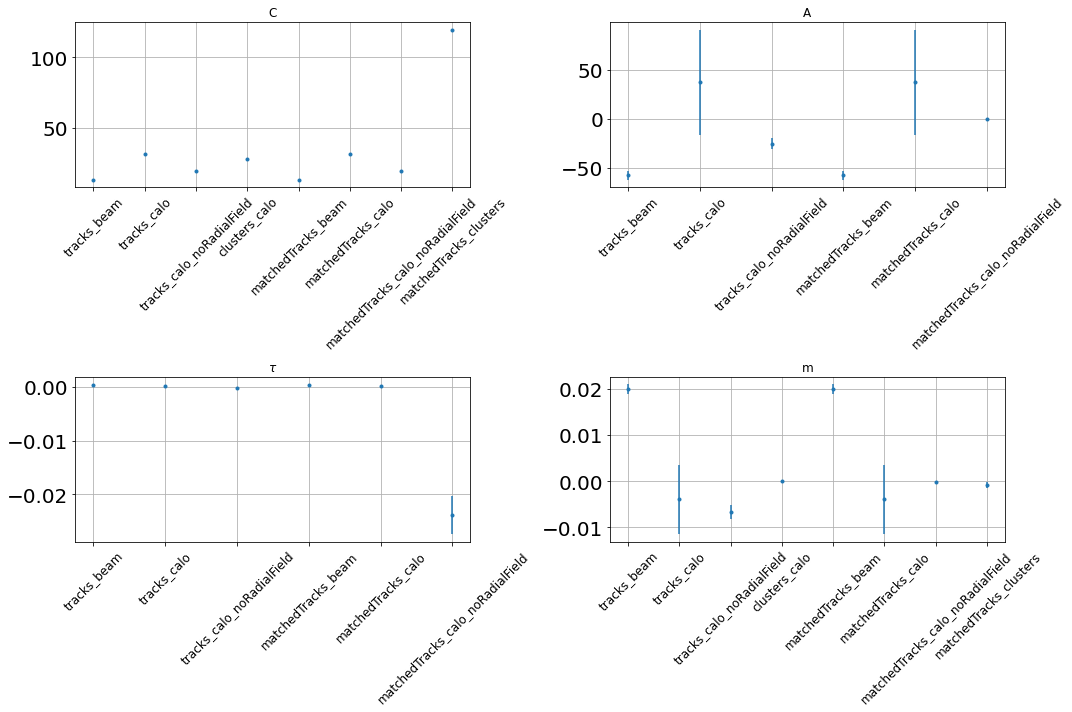

In [56]:
fig,axs = plt.subplots(int(len(parDict)/2),2,figsize=(15,10), sharex=False)
if(len(parDict) > 2):
    ax = flatten2dArray(axs)
else:
    ax = axs

for i, name in enumerate(parDict):
    axi = ax[i]
    thispar = parDict[name]
    axi.errorbar(histNames[name], thispar, yerr=parErrDict[name], fmt=".")
    axi.grid()
    axi.set_title(name)
    plt.sca(axi)
    plt.xticks(rotation=45, fontsize=12,)
plt.tight_layout()
plt.show()

m


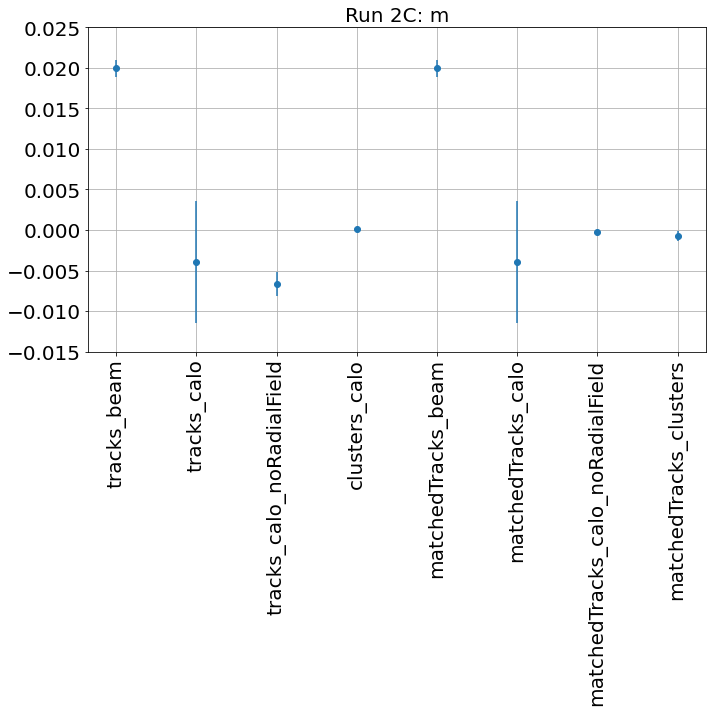

In [57]:
name = allNames[0][3]
print(name)
fig,ax = plt.subplots(figsize=(10,10))
axi = ax
thispar = parDict[name]
#axi.plot(histNames[name], thispar,".")
axi.errorbar(histNames[name], thispar, yerr=parErrDict[name], fmt="o")
axi.grid()
axi.set_title(dataset+": "+name,fontsize=20)
plt.sca(axi)
plt.xticks(rotation=90,)
plt.tight_layout()
plt.ylim(-0.015,0.025)
#plt.ylim(-0.015,0.025)
#plt.ylim(-0.02,0.04)
#plt.ylim(-0.015,0.025)
plt.show()